# Implementing Logistic Regression From Scratch 

/var/folders/gh/01q9wrls05gc9n_xlqkhf6h40000gn/T/ipykernel_4043/2035525307.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-(np.dot(w, xi) + b)))


Misclassified examples: 47
Accuracy: 91.73989455184535 %


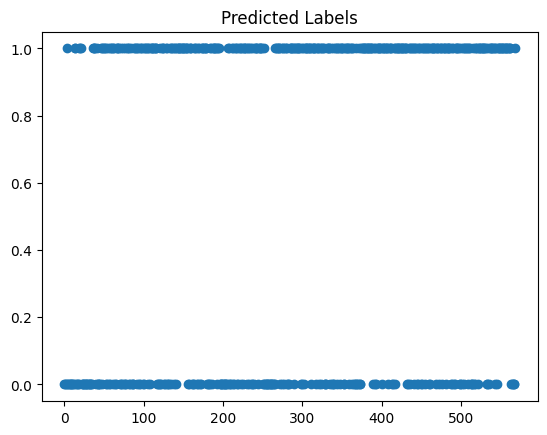

[ 6.56492794e+00 -3.91730714e+00  2.91411099e+01  5.02373148e+00
 -5.54381952e-03 -2.98549337e-01 -4.96469922e-01 -1.94793820e-01
 -4.38825578e-03  1.63962544e-02  6.62448026e-02 -1.23523725e-01
 -1.21754706e+00 -1.27821212e+01 -5.66041231e-03 -7.94061048e-02
 -1.10979173e-01 -2.45464128e-02 -1.40707781e-02 -5.84037999e-03
  6.97730788e+00 -1.02658905e+01  1.99314466e+01 -9.30557851e+00
 -5.26424825e-02 -1.07300340e+00 -1.42462109e+00 -3.64812177e-01
 -1.73183535e-01 -6.19254017e-02]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load and preprocess data
data = datasets.load_breast_cancer()
x = data.data   # shape: (569, 30)
y = data.target # shape: (569,)

# Parameters
w = np.zeros(30)
w.fill(0)
b = 0
alpha = 0.01

# Sigmoid function
def sigmoid_calc(xi, w, b):
    return 1 / (1 + np.exp(-(np.dot(w, xi) + b)))

# Gradient with respect to weights
def gradDesJw(x, y, w, b):
    m = len(x)
    Jw = np.zeros_like(w)
    for i in range(m):
        pred = sigmoid_calc(x[i], w, b)
        Jw += (pred - y[i]) * x[i]
    return Jw / m

# Gradient with respect to bias
def gradDesJb(x, y, w, b):
    m = len(x)
    Jb = 0
    for i in range(m):
        pred = sigmoid_calc(x[i], w, b)
        Jb += (pred - y[i])
    return Jb / m

# Training
t = 10000
losses = []
while t >= 0:
    w_des = alpha * gradDesJw(x, y, w, b)
    b_des = alpha * gradDesJb(x, y, w, b)
    w -= w_des
    b -= b_des
    t -= 1

# Predict
y_pred = np.zeros(len(x))
count = 0
for i in range(len(x)):
    prob = sigmoid_calc(x[i], w, b)
    y_pred[i] = 1 if prob >= 0.5 else 0
    if y_pred[i] != y[i]:
        count += 1

print("Misclassified examples:", count)
print("Accuracy:", (1 - count / len(x)) * 100, "%")

# Plot predictions
plt.plot(y_pred,'o')
plt.title("Predicted Labels")
plt.show()
print(w)


# write whole code again with high performance 